# 1 Ajustement d’images par correction gamma

In [11]:
from PIL  import Image
import numpy as np
import matplotlib.pyplot as plt


In [55]:
imgGot = np.array(Image.open('images/got.jpg'), dtype=np.float)

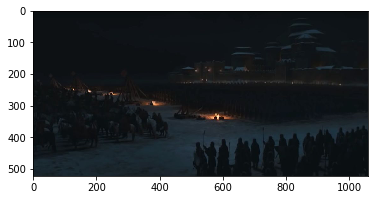

In [63]:

def display(img):
    tod = np.array(img,dtype='uint16')
    plt.imshow(tod)
    
display(imgGot)

In [76]:
imgLowGamma = np.power(imgGot[...,], [0.1, .5, .9])
imgHighGamma = np.power(imgGot[...,], [2.0, 3.0, 4.0])

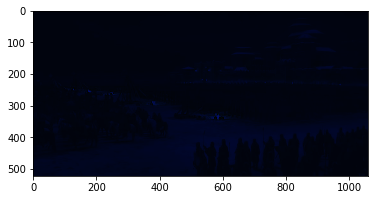

In [79]:
display(imgLowGamma)

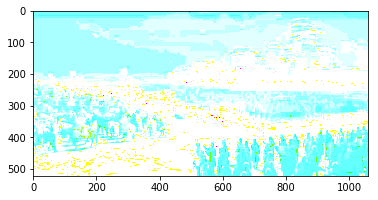

In [80]:
display(imgHighGamma)

# 2 Filtrage d’images

In [ ]:
def gaussian_kernel(sigma, size):
    